In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/weather_2012.csv')
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
df.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [5]:
df.shape

(8784, 8)

In [6]:
"""
1. The median temperature by month
"""
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           8784 non-null   datetime64[ns]
 1   Temp (C)            8784 non-null   float64       
 2   Dew Point Temp (C)  8784 non-null   float64       
 3   Rel Hum (%)         8784 non-null   int64         
 4   Wind Spd (km/h)     8784 non-null   int64         
 5   Visibility (km)     8784 non-null   float64       
 6   Stn Press (kPa)     8784 non-null   float64       
 7   Weather             8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [7]:
df['month'] = df['Date/Time'].dt.month
df.month.value_counts()

7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     696
Name: month, dtype: int64

In [8]:
median_temps_df = df.groupby('month').median()['Temp (C)'].reset_index()
median_temps_df

,month,Temp (C)
0,1,-7.05
1,2,-4.10
2,3,2.60
3,4,6.30
4,5,16.05
5,6,19.60
6,7,22.90
7,8,22.20
8,9,16.10
9,10,11.30


In [9]:
"""
2. The median wind speed by month
3. The snowiest months (Hint: this one will require manipulating and classifying the existing data.)
"""
median_wind_speeds_df = df.groupby('month').median()['Wind Spd (km/h)'].reset_index()
median_wind_speeds_df

,month,Wind Spd (km/h)
0,1,17.0
1,2,15.0
2,3,13.0
3,4,17.0
4,5,11.0
5,6,15.0
6,7,11.0
7,8,13.0
8,9,13.0
9,10,15.0


In [10]:
"""
3. The snowiest months (Hint: this one will require manipulating and classifying the existing data.)
"""
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1


In [11]:
df.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [12]:
390+60+37+19+18+15+11+6+5+4+4+4+2+2+2+1+1+1+1

583

In [13]:
df['snow'] = df.Weather.str.find('now', 1)
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,month,snow
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,-1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,-1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,-1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,-1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,-1


In [14]:
df.snow.value_counts()

-1     8201
 1      522
 6       24
 9       17
 18      11
 10       6
 14       2
 15       1
Name: snow, dtype: int64

In [15]:
522+24+17+11+6+2+1

583

In [16]:
df['snow'] = df.snow.apply(lambda x: 'snow' if x != -1 else 'no snow')

In [17]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,month,snow
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,no snow
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,no snow
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,no snow
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,no snow
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,no snow


In [18]:
df.snow.value_counts()

no snow    8201
snow        583
Name: snow, dtype: int64

In [19]:
snowest_month_df = df[['month','snow']].loc[df.snow == 'snow']
snowest_month_df

,month,snow
41,1,snow
44,1,snow
45,1,snow
47,1,snow
48,1,snow
...,...,...
8779,12,snow
8780,12,snow
8781,12,snow
8782,12,snow


In [20]:
snowest_month_df.shape

(583, 2)

In [21]:
snowest_month_df_counts = snowest_month_df.groupby('month').count()['snow'].reset_index()
snowest_month_df_counts.sort_values('snow', ascending=False)

,month,snow
5,12,187
0,1,179
1,2,113
2,3,65
4,11,28
3,4,11


### Play around...

In [22]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,month,snow
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,no snow
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,no snow
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,no snow
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,no snow
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,no snow


In [23]:
avg_temp_by_month = df.groupby(['month']).mean()['Temp (C)'].reset_index()
avg_temp_by_month

,month,Temp (C)
0,1,-7.371505
1,2,-4.225000
2,3,3.121237
3,4,7.009306
4,5,16.237769
5,6,20.134028
6,7,22.790054
7,8,22.279301
8,9,16.484444
9,10,10.954973


In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

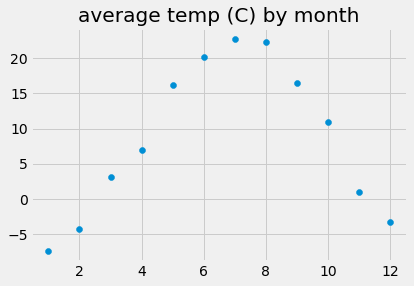

In [25]:
plt.scatter(avg_temp_by_month.month
            , avg_temp_by_month['Temp (C)']
           )
plt.title('average temp (C) by month');